In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv("emotionsdata.csv")
df.head()
#*
# https://www.kaggle.com/datasets/parulpandey/emotion-dataset----dataset link

,text,emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df.describe()
#*

,text,emotion
count,2503,2503
unique,2346,6
top,"The storm of anger brews within me, gathering ...",joy
freq,5,695


In [ ]:
df.emotion.value_counts()
#*

joy         695
sadness     682
anger       475
love        361
fear        224
surprise     66
Name: emotion, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
l_encoder=LabelEncoder()
print(l_encoder)
#*

LabelEncoder()


In [ ]:
df['emotion']=l_encoder.fit_transform(df['emotion'])
#*

In [ ]:
df

,text,emotion
0,im feeling rather rotten so im not very ambiti...,4
1,im updating my blog because i feel shitty,4
2,i never make her separate from me because i do...,4
3,i left with my bouquet of red and yellow tulip...,2
4,i was feeling a little vain when i did this one,4
...,...,...
2498,Love's embrace is a constant reminder that I a...,3
2499,"Love's symphony weaves a tapestry of emotions,...",3
2500,"In love's gentle touch, I find solace, healing...",3
2501,"Love's radiance shines brightly, illuminating ...",3


In [ ]:
df['emotion'].unique()
#*

array([4, 2, 1, 0, 3, 5])

In [ ]:
l_encoder.inverse_transform([0,1,2,3,4,5])
#*

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.text,df.emotion,test_size=0.2)
#*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
# df['text'] = df['text'].str.lower()
x_train_count.toarray()[:3]
#*


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
print(x_train)
print('_________________________________________________________________________________________________')
print(x_train.values)

1067                    i am feeling very petty right now
628     i have tested positive but i have never taken ...
253     i get frustrated that unresolved issues from m...
778     im begging fate not to mess with the next cycl...
2101    Anger simmers within me, ready to erupt like a...
                              ...                        
1613    i feel very cheated since i am supporting the ...
8       i like to have the same breathless feeling as ...
41      i feel humiliated embarrassed or foolish i wil...
1770    i feel like he has a very pleasant nearly tran...
1056    i don t feel i can ask him what feels like a d...
Name: text, Length: 2002, dtype: object
_________________________________________________________________________________________________
['i am feeling very petty right now'
 'i have tested positive but i have never taken drugs and i feel innocent says martina'
 'i get frustrated that unresolved issues from my past have had a severe negative effect on my beha

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',DecisionTreeClassifier(random_state=1,max_depth=1700))
])
#*

In [ ]:
clf.fit(x_train.values,y_train)
#*

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb', DecisionTreeClassifier(max_depth=1700, random_state=1))])

In [ ]:
clf.score(x_test,y_test)
#*

0.780439121756487

In [ ]:
clf.score(x_train,y_train)
#*

1.0

In [ ]:
# l = v.fit_transform(['i feel proud to know several people that have deserved to be advanced for a while now and finally picked it up this time around or last time in a few peoples cases'])
# l.toarray()[:3]
# # x_train_count.toarray()[:3]
# print(l)
# y=clf.predict(np.array(['i feel proud to know several people that have deserved to be advanced for a while now and finally picked it up this time around or last time in a few peoples cases']))
a=['i love you']
# y=clf.predict(np.array(['i start to feel lethargic about blogging ']))
y=clf.predict(np.array(a))
y



array([3])

In [ ]:
y_pre = clf.predict(np.array(x_test))
y_pre

array([4, 0, 2, 4, 2, 2, 4, 3, 2, 2, 4, 2, 0, 2, 4, 3, 2, 0, 0, 0, 3, 5,
       2, 2, 2, 2, 2, 4, 0, 2, 2, 4, 0, 0, 2, 2, 4, 2, 4, 4, 1, 4, 2, 1,
       4, 4, 0, 0, 2, 5, 0, 3, 3, 1, 2, 2, 1, 2, 4, 2, 4, 2, 1, 1, 2, 4,
       3, 2, 2, 1, 2, 4, 4, 4, 0, 3, 2, 2, 2, 3, 2, 4, 4, 0, 2, 2, 4, 4,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 1, 4,
       2, 1, 2, 2, 2, 3, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 1,
       2, 2, 5, 2, 2, 4, 0, 2, 0, 2, 3, 2, 2, 5, 4, 2, 2, 2, 2, 4, 2, 2,
       2, 4, 0, 3, 4, 2, 2, 2, 1, 2, 5, 4, 2, 0, 2, 2, 3, 2, 1, 2, 4, 4,
       2, 4, 2, 2, 4, 2, 2, 2, 2, 0, 1, 4, 4, 4, 5, 4, 4, 3, 4, 2, 2, 5,
       0, 2, 2, 5, 2, 2, 2, 2, 4, 3, 4, 4, 4, 1, 2, 0, 4, 4, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 0, 3, 1, 2, 2, 4, 0, 4, 2, 2, 4, 2, 0, 4, 3, 1,
       5, 2, 2, 3, 4, 4, 2, 3, 1, 4, 5, 4, 2, 0, 2, 2, 2, 0, 2, 4, 3, 0,
       0, 4, 1, 2, 2, 3, 0, 2, 3, 1, 2, 0, 2, 2, 0, 2, 4, 0, 2, 1, 2, 2,
       2, 1, 0, 4, 2, 4, 0, 2, 2, 2, 2, 1, 4, 2, 2,

In [ ]:
k=np.array(x_test)
k

array(['i think i started to feel a little homesick',
       'im not the one who feel bothered about this',
       'im feeling better so hopefully things start falling back into the old routine',
       'i could maybe get away with simpler folk melodies on some of the songs something fairly predictable but if its just me and a guitar it would end up feeling dull',
       'i feel i m handling it well and i m enjoying it he said',
       'i wasn t feeling well but no specific issue',
       'i go onto the officer down memorial page and reflect on my feelings about that wonderful officer which seems to make me feel a little better',
       'i feel that the packaging is really lovely and the product itself just does everything you ask',
       'im feeling rather angsty and listless',
       'i have been designing earrings for some of my customers bridesmaids which i feel honoured to do',
       'i am feeling rather damaged',
       'i didint feel any love and caring now',
       'i feel th

In [ ]:
d=DecisionTreeClassifier()
d.__dir__()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

# Define the pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', DecisionTreeClassifier(random_state=1, max_depth=1700))
])

# Train and evaluate with Decision Tree Classifier
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print("Accuracy (Decision Tree Classifier):", accuracy)

# Change the classifier to Random Forest Classifier
clf.set_params(classifier=RandomForestClassifier(random_state=1, n_estimators=100))
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print("Accuracy (Random Forest Classifier):", accuracy)

# Change the classifier to Support Vector Classifier
clf.set_params(classifier=SVC(random_state=30))
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print("Accuracy (Support Vector Classifier):", accuracy)

# Continue with other classifiers as needed
clf.set_params(classifier=LogisticRegression(random_state=30))
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print("Accuracy (Logistic regression):", accuracy)


Accuracy (Decision Tree Classifier): 0.7544910179640718
Accuracy (Random Forest Classifier): 0.5988023952095808
Accuracy (Support Vector Classifier): 0.5389221556886228
Accuracy (Logistic regression): 0.7065868263473054


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

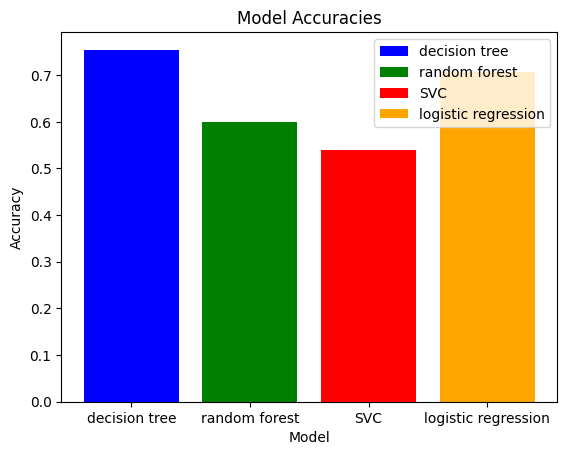

In [ ]:
dtreeacc = 0.7544910179640718
rtc = 0.5988023952095808
svcacc = 0.5389221556886228
lracc = 0.7065868263473054

a = ["decision tree", "random forest", "SVC", "logistic regression"]
x = [dtreeacc, rtc, svcacc, lracc]
colors = ['blue', 'green', 'red', 'orange']

# Plotting the bar plot
bars = plt.bar(a, x, color=colors)

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')

# Adding a legend with colors corresponding to the models
plt.legend(bars, a)

# Display the plot
plt.show()

save the trained model


In [ ]:
import pickle

In [ ]:
filename='miniproject.sav'
pickle.dump(clf,open(filename,'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('miniproject.sav','rb'))

In [ ]:
# a=['i love you']
# a=['i had that kinda feeling but ignored it']
a=['i am sad']
y=loaded_model.predict(np.array(a))
y

array([2])